In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data 
df = pd.read_csv(r"C:\Users\dell\Downloads\Credit Card Spending Analysis\Credit Card Spending in India.csv")
print("\n First 10 rows")
print(df.head(10))



 First 10 rows
   index                   City       Date  Card Type Exp Type Gender  \
0    0.0           Delhi, India  29-Oct-14       Gold    Bills      F   
1    1.0  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   
2    2.0       Bengaluru, India  27-Aug-14     Silver    Bills      F   
3    3.0  Greater Mumbai, India  12-Apr-14  Signature    Bills      F   
4    4.0       Bengaluru, India   5-May-15       Gold    Bills      F   
5    5.0           Delhi, India   8-Sep-14     Silver    Bills      F   
6    6.0           Delhi, India  24-Feb-15       Gold    Bills      F   
7    7.0  Greater Mumbai, India  26-Jun-14   Platinum    Bills      F   
8    8.0           Delhi, India  28-Mar-14     Silver    Bills      F   
9    9.0           Delhi, India   1-Sep-14   Platinum    Bills      F   

     Amount  
0   82475.0  
1   32555.0  
2  101738.0  
3  123424.0  
4  171574.0  
5  100036.0  
6  143250.0  
7  150980.0  
8  192247.0  
9   67932.0  


In [4]:
# Basicinfo of the data 
print("Dataset info:")
print(df.info())
print("\nColumns Names")
print(df.columns.tolist())
print("\n Data types")
print(df.dtypes)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      101 non-null    float64
 1   City       101 non-null    object 
 2   Date       101 non-null    object 
 3   Card Type  101 non-null    object 
 4   Exp Type   101 non-null    object 
 5   Gender     101 non-null    object 
 6   Amount     101 non-null    float64
dtypes: float64(2), object(5)
memory usage: 1.4+ MB
None

Columns Names
['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount']

 Data types
index        float64
City          object
Date          object
Card Type     object
Exp Type      object
Gender        object
Amount       float64
dtype: object


In [5]:
# Checking missing values
print("Missing values: ")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100 
missing_df = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing Percentage": missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing values: 
           Missing Count  Missing Percentage
index              25951           99.612314
City               25951           99.612314
Date               25951           99.612314
Card Type          25951           99.612314
Exp Type           25951           99.612314
Gender             25951           99.612314
Amount             25951           99.612314


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%y')
# Extracting additional features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_name'] = df['Date'].dt.month_name()
df['Day_of_the_week'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter

In [7]:
print("Data after processing")
print(df.head())

Data after processing
   index                   City       Date  Card Type Exp Type Gender  \
0    0.0           Delhi, India 2014-10-29       Gold    Bills      F   
1    1.0  Greater Mumbai, India 2014-08-22   Platinum    Bills      F   
2    2.0       Bengaluru, India 2014-08-27     Silver    Bills      F   
3    3.0  Greater Mumbai, India 2014-04-12  Signature    Bills      F   
4    4.0       Bengaluru, India 2015-05-05       Gold    Bills      F   

     Amount    Year  Month Month_name Day_of_the_week  Quarter  
0   82475.0  2014.0   10.0    October       Wednesday      4.0  
1   32555.0  2014.0    8.0     August          Friday      3.0  
2  101738.0  2014.0    8.0     August       Wednesday      3.0  
3  123424.0  2014.0    4.0      April        Saturday      2.0  
4  171574.0  2015.0    5.0        May         Tuesday      2.0  


In [8]:
# Descriptive statistics 
print("Descriptive statistics of the data")
print(df.describe())

print("\n Descriptive statistics of the categorical columns")
print(df.describe(include=['object']))

Descriptive statistics of the data
            index                           Date         Amount         Year  \
count  101.000000                            101     101.000000   101.000000   
mean    50.000000  2014-07-12 15:12:28.514851584  517599.831683  2014.089109   
min      0.000000            2013-10-04 00:00:00   19226.000000  2013.000000   
25%     25.000000            2014-02-27 00:00:00  302834.000000  2014.000000   
50%     50.000000            2014-06-26 00:00:00  525977.000000  2014.000000   
75%     75.000000            2015-01-08 00:00:00  722587.000000  2015.000000   
max    100.000000            2015-05-13 00:00:00  998077.000000  2015.000000   
std     29.300171                            NaN  261440.499890     0.649600   

            Month     Quarter  
count  101.000000  101.000000  
mean     5.821782    2.287129  
min      1.000000    1.000000  
25%      3.000000    1.000000  
50%      5.000000    2.000000  
75%      9.000000    3.000000  
max     12.000000   

In [9]:
# Unique value analysis
print("Unique value analysis in each column")
for col in df.columns:
    if col != 'index':
        print(f"{col}:{df[col].nunique()} unique values")
        if df[col].nunique() > 20:
            print(f"Values: {df[col].unique()}")
        print()


Unique value analysis in each column
City:4 unique values

Date:91 unique values
Values: <DatetimeArray>
['2014-10-29 00:00:00', '2014-08-22 00:00:00', '2014-08-27 00:00:00',
 '2014-04-12 00:00:00', '2015-05-05 00:00:00', '2014-09-08 00:00:00',
 '2015-02-24 00:00:00', '2014-06-26 00:00:00', '2014-03-28 00:00:00',
 '2014-09-01 00:00:00', '2014-06-22 00:00:00', '2013-12-07 00:00:00',
 '2014-08-07 00:00:00', '2014-04-27 00:00:00', '2014-08-15 00:00:00',
 '2014-11-28 00:00:00', '2014-06-14 00:00:00', '2015-03-30 00:00:00',
 '2014-03-15 00:00:00', '2013-11-09 00:00:00', '2014-04-04 00:00:00',
 '2014-07-01 00:00:00', '2015-03-27 00:00:00', '2013-10-11 00:00:00',
 '2014-03-26 00:00:00', '2014-09-27 00:00:00', '2014-03-23 00:00:00',
 '2014-05-17 00:00:00', '2015-01-18 00:00:00', '2015-04-18 00:00:00',
 '2014-07-31 00:00:00', '2015-02-11 00:00:00', '2013-11-24 00:00:00',
 '2014-11-08 00:00:00', '2014-09-06 00:00:00', '2015-03-24 00:00:00',
 '2014-01-01 00:00:00', '2014-07-12 00:00:00', '2014-02

In [10]:
# Amount analysis
print("Amount Statistics")
print(f"Total amount: ₹{df['Amount'].sum():,.2f}")
print(f"Average amount: ₹{df['Amount'].mean():,.2f}")
print(f"Median amount: ₹{df['Amount'].median():,.2f}")
print(f"STD : ₹{df['Amount'].std():,.2f}")
print(f"Minimm amount: ₹{df['Amount'].min():,.2f}")
print(f"Maximum amount: ₹{df['Amount'].max():,.2f}")

Amount Statistics
Total amount: ₹52,277,583.00
Average amount: ₹517,599.83
Median amount: ₹525,977.00
STD : ₹261,440.50
Minimm amount: ₹19,226.00
Maximum amount: ₹998,077.00


Text(0, 0.5, 'Frequency')

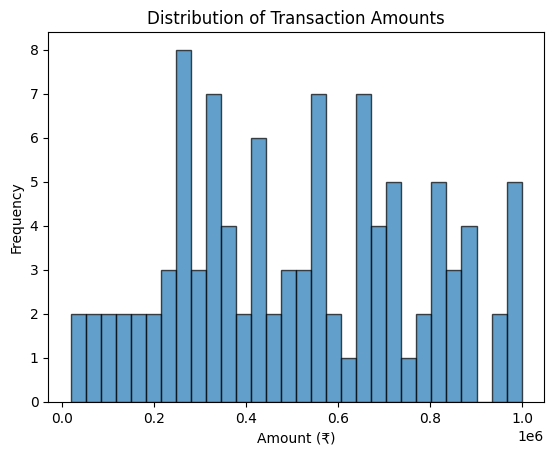

In [11]:
# Distribution of amount 
plt.hist(df['Amount'], bins=30, edgecolor='black', alpha=0.7 )
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount (₹)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Amount (₹)')

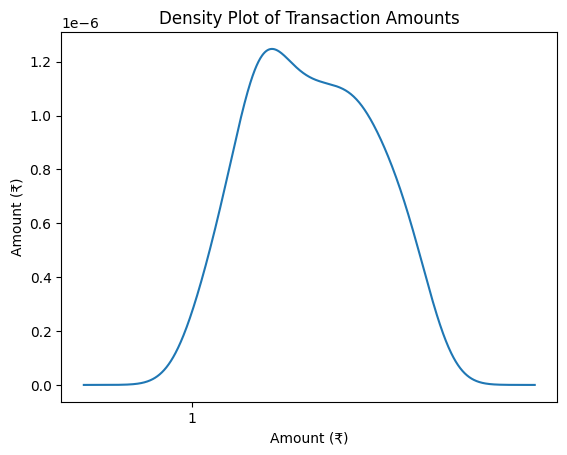

In [12]:
# Box plot 
plt.boxplot(df['Amount'])
plt.title("Box plot of transcation amounts")
df['Amount'].plot(kind='kde')
plt.title('Density Plot of Transaction Amounts')
plt.xlabel('Amount (₹)')
plt.ylabel('Amount (₹)')

In [13]:
# City wise analysis
city_analysis = df.groupby('City').agg({
    'Amount':['count','sum','mean','median'],
    'Card Type':'nunique'
}).round(2)
city_analysis.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Median_Amount', 'Unique_Card_Types']
print("City-wise Analysis:")
print(city_analysis)

City-wise Analysis:
                       Transaction_Count  Total_Amount  Avg_Amount  \
City                                                                 
Ahmedabad, India                      20    11231805.0   561590.25   
Bengaluru, India                      20     9881486.0   494074.30   
Delhi, India                          27    13094797.0   484992.48   
Greater Mumbai, India                 34    18069495.0   531455.74   

                       Median_Amount  Unique_Card_Types  
City                                                     
Ahmedabad, India            542891.5                  4  
Bengaluru, India            426551.0                  4  
Delhi, India                478861.0                  4  
Greater Mumbai, India       550567.0                  4  


Text(0, 0.5, 'Total Amount (₹)')

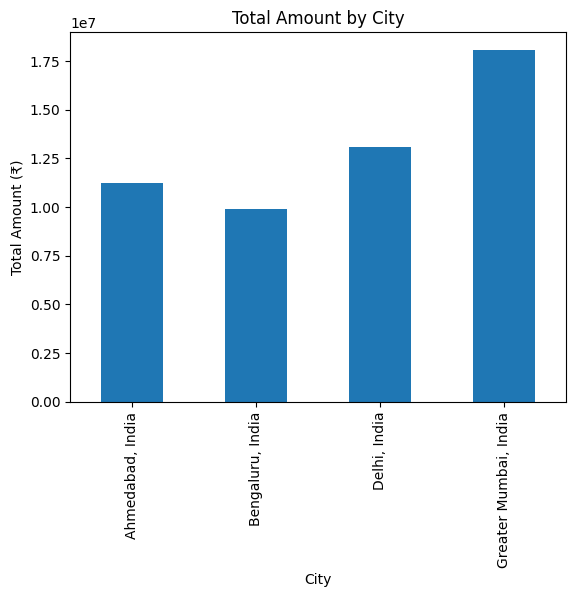

In [14]:
# Visualtion of the cities
city_amounts = df.groupby('City')['Amount'].sum()
city_amounts.plot(kind='bar')
plt.title('Total Amount by City')
plt.xlabel('City')
plt.ylabel('Total Amount (₹)')

Text(0, 0.5, 'Number of Transactions')

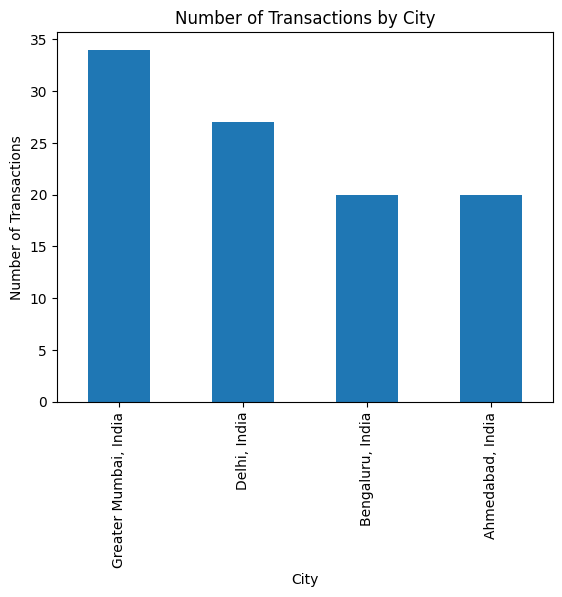

In [15]:
df['City'].value_counts().plot(kind='bar')
plt.title('Number of Transactions by City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')

In [16]:
# Card Type Analysis
card_analysis = df.groupby('Card Type').agg({
    'Amount': ['count', 'sum', 'mean', 'median']
}).round(2)
card_analysis.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Median_Amount']
print("Card Type Analysis:")
print(card_analysis)

Card Type Analysis:
           Transaction_Count  Total_Amount  Avg_Amount  Median_Amount
Card Type                                                            
Gold                      28    15111818.0   539707.79       513374.0
Platinum                  33    18351549.0   556107.55       581882.0
Signature                 23    10758767.0   467772.48       421878.0
Silver                    17     8055449.0   473849.94       467014.0


Text(0.5, 1.0, 'Distribution by Card Type')

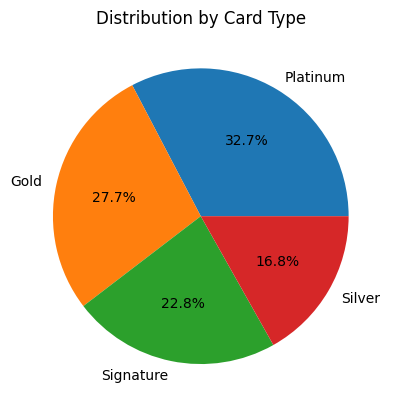

In [17]:
# Pie chart of card type counts
card_counts = df['Card Type'].value_counts()
plt.pie(card_counts.values, labels=card_counts.index, autopct='%1.1f%%')
plt.title('Distribution by Card Type')

Text(0, 0.5, 'Total Amount (₹)')

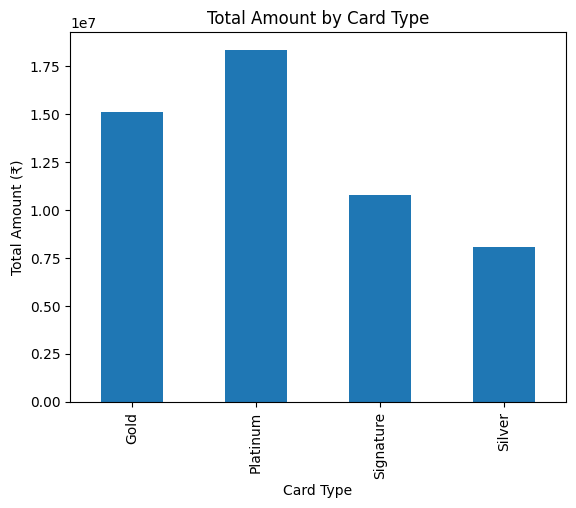

In [18]:
df.groupby('Card Type')['Amount'].sum().plot(kind='bar')
plt.title('Total Amount by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Total Amount (₹)')

Text(0, 0.5, 'Average Amount (₹)')

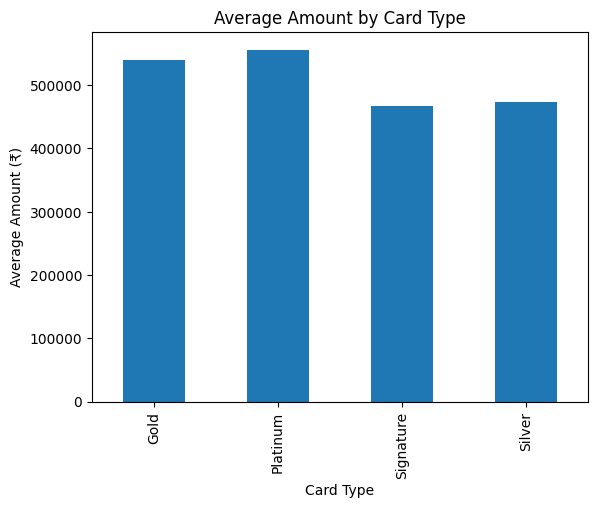

In [19]:
df.groupby('Card Type')['Amount'].mean().plot(kind='bar')
plt.title('Average Amount by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Average Amount (₹)')

In [20]:
# Gender Analysis
gender_analysis = df.groupby('Gender').agg({
    'Amount': ['count', 'sum', 'mean', 'median']
}).round(2)
gender_analysis.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Median_Amount']
print("Gender Analysis:")
print(gender_analysis)

Gender Analysis:
        Transaction_Count  Total_Amount  Avg_Amount  Median_Amount
Gender                                                            
F                     101    52277583.0   517599.83       525977.0


In [21]:
# Expense type analysis
exp_analysis = df.groupby('Exp Type').agg({
    'Amount': ['count', 'sum', 'mean', 'median']
}).round(2)
exp_analysis.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Median_Amount']
print("Expense Type Analysis:")
print(exp_analysis)



Expense Type Analysis:
          Transaction_Count  Total_Amount  Avg_Amount  Median_Amount
Exp Type                                                            
Bills                   101    52277583.0   517599.83       525977.0


In [22]:
# Time based Analysis
monthly_trends = df.groupby(['Year', 'Month_name'])['Amount'].sum().reset_index()
print("Monthly Transaction Amounts:")
print(monthly_trends)

# Quarterly analysis
quarterly_analysis = df.groupby('Quarter').agg({
    'Amount': ['count', 'sum', 'mean']
}).round(2)
quarterly_analysis.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount']
print("\nQuarterly Analysis:")
print(quarterly_analysis)

Monthly Transaction Amounts:
      Year Month_name     Amount
0   2013.0   December  3375663.0
1   2013.0   November  2438695.0
2   2013.0    October  4090700.0
3   2014.0      April  3261018.0
4   2014.0     August  1243715.0
5   2014.0   December   853074.0
6   2014.0   February  3804083.0
7   2014.0    January   923657.0
8   2014.0       July  2036999.0
9   2014.0       June  3342344.0
10  2014.0      March  3499334.0
11  2014.0        May  1964449.0
12  2014.0   November  3092860.0
13  2014.0    October  1080552.0
14  2014.0  September  1480096.0
15  2015.0      April  2634059.0
16  2015.0   February  3858166.0
17  2015.0    January  5584386.0
18  2015.0      March  2408053.0
19  2015.0        May  1305680.0

Quarterly Analysis:
         Transaction_Count  Total_Amount  Avg_Amount
Quarter                                             
1.0                     36    20077679.0   557713.31
2.0                     25    12507550.0   500302.00
3.0                     15     4760810.0   31

Text(0, 0.5, 'Total Amount (₹)')

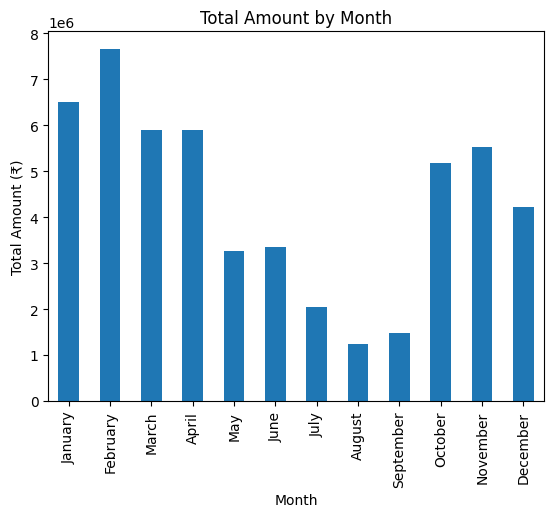

In [23]:
# Monthly based visulization
monthly_amounts = df.groupby('Month_name')['Amount'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_amounts = monthly_amounts.reindex([m for m in month_order if m in monthly_amounts.index])
monthly_amounts.plot(kind='bar')
plt.title('Total Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount (₹)')

Text(0, 0.5, 'Total Amount (₹)')

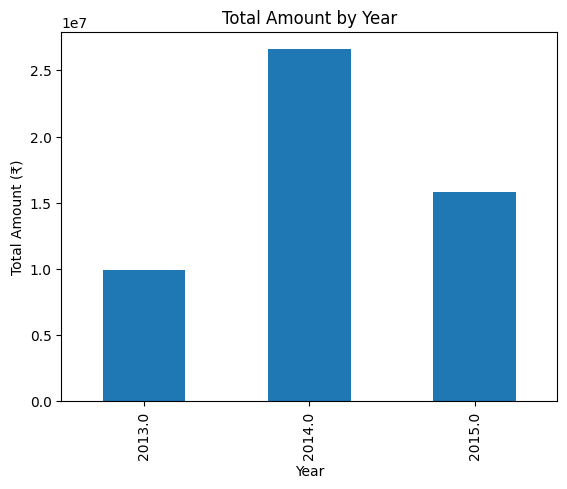

In [24]:
# year wise
df.groupby('Year')['Amount'].sum().plot(kind='bar')
plt.title('Total Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount (₹)')

Text(0, 0.5, 'Total Amount (₹)')

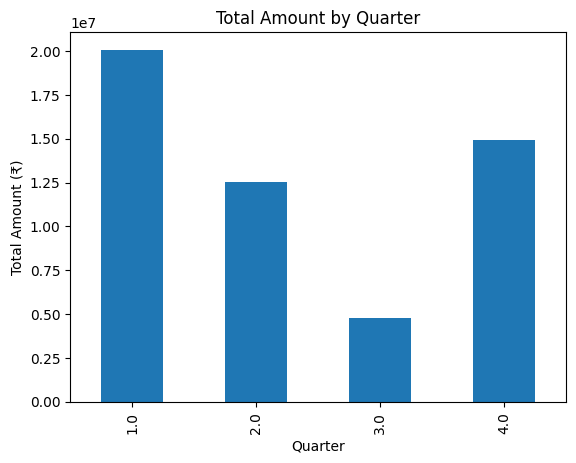

In [25]:
# Quarter wise
df.groupby('Quarter')['Amount'].sum().plot(kind='bar')
plt.title('Total Amount by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Amount (₹)')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

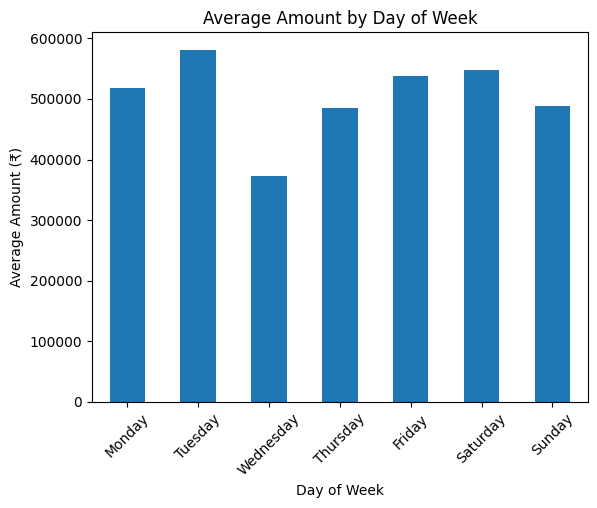

In [26]:
# Week wise
day_amounts = df.groupby('Day_of_the_week')['Amount'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_amounts = day_amounts.reindex([d for d in day_order if d in day_amounts.index])
day_amounts.plot(kind='bar')
plt.title('Average Amount by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Amount (₹)')
plt.xticks(rotation=45)

In [27]:
# Cross tablation analysis 
print("Cross-tabulation: City vs Card ")
city_card_crosstab = pd.crosstab(df['City'],df['Card Type'], margins=True)
print(city_card_crosstab)

print("\nCross-tabulation: Gender vs Card Type")
gender_card_crosstab = pd.crosstab(df['Gender'],df['Card Type'], margins=True)
print(gender_card_crosstab)

Cross-tabulation: City vs Card 
Card Type              Gold  Platinum  Signature  Silver  All
City                                                         
Ahmedabad, India          5         5          5       5   20
Bengaluru, India          9         7          1       3   20
Delhi, India              4         9          8       6   27
Greater Mumbai, India    10        12          9       3   34
All                      28        33         23      17  101

Cross-tabulation: Gender vs Card Type
Card Type  Gold  Platinum  Signature  Silver  All
Gender                                           
F            28        33         23      17  101
All          28        33         23      17  101


Text(0.5, 1.0, 'Correlation Matrix of Numerical columns')

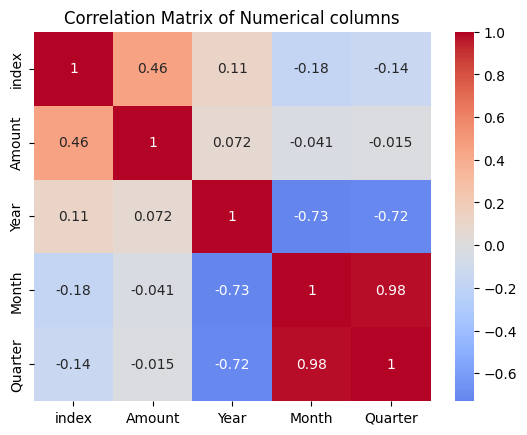

In [28]:
# Correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical columns')


In [29]:
print("Top 10 Highest Transactions:")
top_transactions = df.nlargest(10, 'Amount')[['Date', 'City', 'Card Type', 'Amount']]
print(top_transactions)

print("\nTop Cities by Total Amount:")
top_cities = df.groupby('City')['Amount'].sum().sort_values(ascending=False)
print(top_cities)

print("\nTop Card Types by Average Amount:")
top_cards = df.groupby('Card Type')['Amount'].mean().sort_values(ascending=False)
print(top_cards)

Top 10 Highest Transactions:
         Date                   City Card Type    Amount
80 2014-10-14  Greater Mumbai, India  Platinum  998077.0
68 2014-03-22  Greater Mumbai, India      Gold  991685.0
28 2015-01-18       Bengaluru, India  Platinum  987935.0
17 2015-03-30  Greater Mumbai, India      Gold  986379.0
92 2015-01-19       Bengaluru, India  Platinum  983839.0
35 2015-03-24       Ahmedabad, India  Platinum  954660.0
81 2014-02-02       Ahmedabad, India    Silver  934205.0
58 2013-10-08           Delhi, India  Platinum  900101.0
96 2013-11-01       Bengaluru, India      Gold  896384.0
46 2013-12-10       Ahmedabad, India      Gold  892016.0

Top Cities by Total Amount:
City
Greater Mumbai, India    18069495.0
Delhi, India             13094797.0
Ahmedabad, India         11231805.0
Bengaluru, India          9881486.0
Name: Amount, dtype: float64

Top Card Types by Average Amount:
Card Type
Platinum     556107.545455
Gold         539707.785714
Silver       473849.941176
Signature  

In [30]:
print("="*60)
print("HANDLING CATEGORICAL DATA")
print("="*60)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

for col in categorical_columns:
    if col != 'Date':  # Skip Date if it's still object type
        print(f"\n{col} column:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Values: {df[col].unique()}")
        
        # Clean string data
        if df[col].dtype == 'object':
            # Remove leading/trailing whitespace
            df[col] = df[col].astype(str).str.strip()
            
            # Standardize case (optional - depends on your data)
            # df[col] = df[col].str.title()  # Uncomment if needed
            
            print(f"  After cleaning: {df[col].unique()}")


HANDLING CATEGORICAL DATA
Categorical columns: ['City', 'Card Type', 'Exp Type', 'Gender', 'Month_name', 'Day_of_the_week']

City column:
  Unique values: 4
  Values: ['Delhi, India' 'Greater Mumbai, India' 'Bengaluru, India'
 'Ahmedabad, India' nan]
  After cleaning: ['Delhi, India' 'Greater Mumbai, India' 'Bengaluru, India'
 'Ahmedabad, India' 'nan']

Card Type column:
  Unique values: 4
  Values: ['Gold' 'Platinum' 'Silver' 'Signature' nan]
  After cleaning: ['Gold' 'Platinum' 'Silver' 'Signature' 'nan']

Exp Type column:
  Unique values: 1
  Values: ['Bills' nan]
  After cleaning: ['Bills' 'nan']

Gender column:
  Unique values: 1
  Values: ['F' nan]
  After cleaning: ['F' 'nan']

Month_name column:
  Unique values: 12
  Values: ['October' 'August' 'April' 'May' 'September' 'February' 'June' 'March'
 'December' 'November' 'July' 'January' nan]
  After cleaning: ['October' 'August' 'April' 'May' 'September' 'February' 'June' 'March'
 'December' 'November' 'July' 'January' 'nan']

Da

In [31]:
print("="*60)
print("HANDLING OUTLIERS")
print("="*60)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    print(f"\n{col} outlier analysis:")
    
    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower bound: {lower_bound}")
    print(f"  Upper bound: {upper_bound}")
    print(f"  Outliers count: {len(outliers)}")
    print(f"  Outliers percentage: {len(outliers)/len(df)*100:.2f}%")
    
    if len(outliers) > 0:
        print(f"  Outlier values: {sorted(outliers[col].tolist())}")
    
    # Option to cap outliers (uncomment if needed)
    # df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    # print(f"  Outliers capped to bounds")

HANDLING OUTLIERS

index outlier analysis:
  Q1: 25.0
  Q3: 75.0
  IQR: 50.0
  Lower bound: -50.0
  Upper bound: 150.0
  Outliers count: 0
  Outliers percentage: 0.00%

Amount outlier analysis:
  Q1: 302834.0
  Q3: 722587.0
  IQR: 419753.0
  Lower bound: -326795.5
  Upper bound: 1352216.5
  Outliers count: 0
  Outliers percentage: 0.00%

Year outlier analysis:
  Q1: 2014.0
  Q3: 2015.0
  IQR: 1.0
  Lower bound: 2012.5
  Upper bound: 2016.5
  Outliers count: 0
  Outliers percentage: 0.00%

Month outlier analysis:
  Q1: 3.0
  Q3: 9.0
  IQR: 6.0
  Lower bound: -6.0
  Upper bound: 18.0
  Outliers count: 0
  Outliers percentage: 0.00%

Quarter outlier analysis:
  Q1: 1.0
  Q3: 3.0
  IQR: 2.0
  Lower bound: -2.0
  Upper bound: 6.0
  Outliers count: 0
  Outliers percentage: 0.00%


In [32]:
print("="*60)
print("FEATURE ENGINEERING - DATE FEATURES")
print("="*60)

if 'Date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Date']):
    print("Creating date-based features:")
    
    # Extract date components
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Month_Name'] = df['Date'].dt.month_name()
    df['Day'] = df['Date'].dt.day
    df['Day_of_Week'] = df['Date'].dt.day_name()
    df['Day_of_Year'] = df['Date'].dt.dayofyear
    df['Week_of_Year'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    
    # Create additional features
    df['Is_Weekend'] = df['Date'].dt.dayofweek.isin([5, 6])
    df['Is_Month_Start'] = df['Date'].dt.is_month_start
    df['Is_Month_End'] = df['Date'].dt.is_month_end
    df['Is_Quarter_Start'] = df['Date'].dt.is_quarter_start
    df['Is_Quarter_End'] = df['Date'].dt.is_quarter_end
    
    # Days since earliest date
    df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days
    
    date_features = ['Year', 'Month', 'Month_Name', 'Day', 'Day_of_Week', 
                    'Day_of_Year', 'Week_of_Year', 'Quarter', 'Is_Weekend',
                    'Is_Month_Start', 'Is_Month_End', 'Is_Quarter_Start', 
                    'Is_Quarter_End', 'Days_Since_Start']
    
    print(f"Created features: {date_features}")
    print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"Total days: {(df['Date'].max() - df['Date'].min()).days}")

# Cell 13: Feature Engineering - Amount Features
print("="*60)
print("FEATURE ENGINEERING - AMOUNT FEATURES")
print("="*60)

if 'Amount' in df.columns:
    print("Creating amount-based features:")
    
    # Log transformation for skewed data
    df['Amount_Log'] = np.log1p(df['Amount'])
    
    # Square root transformation
    df['Amount_Sqrt'] = np.sqrt(df['Amount'])
    
    # Amount categories
    amount_percentiles = df['Amount'].quantile([0.25, 0.5, 0.75]).tolist()
    df['Amount_Category'] = pd.cut(df['Amount'], 
                                  bins=[-np.inf] + amount_percentiles + [np.inf],
                                  labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Z-score (standardized amount)
    df['Amount_Zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
    
    # Rank within the dataset
    df['Amount_Rank'] = df['Amount'].rank(method='dense')
    df['Amount_Percentile'] = df['Amount'].rank(pct=True)
    
    amount_features = ['Amount_Log', 'Amount_Sqrt', 'Amount_Category', 
                      'Amount_Zscore', 'Amount_Rank', 'Amount_Percentile']
    
    print(f"Created features: {amount_features}")
    print(f"Amount statistics:")
    print(f"  Min: {df['Amount'].min()}")
    print(f"  Max: {df['Amount'].max()}")
    print(f"  Mean: {df['Amount'].mean():.2f}")
    print(f"  Median: {df['Amount'].median():.2f}")

FEATURE ENGINEERING - DATE FEATURES
Creating date-based features:
Created features: ['Year', 'Month', 'Month_Name', 'Day', 'Day_of_Week', 'Day_of_Year', 'Week_of_Year', 'Quarter', 'Is_Weekend', 'Is_Month_Start', 'Is_Month_End', 'Is_Quarter_Start', 'Is_Quarter_End', 'Days_Since_Start']

Date range: 2013-10-04 00:00:00 to 2015-05-13 00:00:00
Total days: 586
FEATURE ENGINEERING - AMOUNT FEATURES
Creating amount-based features:
Created features: ['Amount_Log', 'Amount_Sqrt', 'Amount_Category', 'Amount_Zscore', 'Amount_Rank', 'Amount_Percentile']
Amount statistics:
  Min: 19226.0
  Max: 998077.0
  Mean: 517599.83
  Median: 525977.00


In [33]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

if len(outliers) > 0:
    print("\nOutlier transactions:")
    print(outliers[['Date', 'City', 'Card Type', 'Amount']].head(10))


Number of outliers: 0
Percentage of outliers: 0.00%


In [34]:
print("="*60)
print("HANDLING MISSING VALUES")
print("="*60)

# Check missing values before handling
missing_before = df.isnull().sum()
print("Missing values before handling:")
print(missing_before[missing_before > 0])

# Handle missing values based on column type and business logic
if df.isnull().sum().sum() > 0:
    # For categorical columns, fill with mode or 'Unknown'
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_value = df[col].mode()
            if len(mode_value) > 0:
                df[col].fillna(mode_value[0], inplace=True)
                print(f"Filled {col} missing values with mode: {mode_value[0]}")
            else:
                df[col].fillna('Unknown', inplace=True)
                print(f"Filled {col} missing values with 'Unknown'")
    
    # For numerical columns, fill with median or mean
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Filled {col} missing values with median: {median_value}")

# Check missing values after handling
missing_after = df.isnull().sum()
print(f"\nMissing values after handling:")
print(missing_after[missing_after > 0])


HANDLING MISSING VALUES
Missing values before handling:
index                25951
Date                 25951
Amount               25951
Year                 25951
Month                25951
Quarter              25951
Month_Name           25951
Day                  25951
Day_of_Week          25951
Day_of_Year          25951
Week_of_Year         25951
Days_Since_Start     25951
Amount_Log           25951
Amount_Sqrt          25951
Amount_Category      25951
Amount_Zscore        25951
Amount_Rank          25951
Amount_Percentile    25951
dtype: int64
Filled Month_Name missing values with mode: February
Filled Day_of_Week missing values with mode: Tuesday
Filled index missing values with median: 50.0
Filled Amount missing values with median: 525977.0
Filled Year missing values with median: 2014.0
Filled Month missing values with median: 5.0
Filled Quarter missing values with median: 2.0
Filled Day missing values with median: 14.0
Filled Day_of_Year missing values with median: 128.0
Filled

In [35]:
print("="*60)
print("REMOVING DUPLICATES")
print("="*60)

print(f"Rows before removing duplicates: {len(df)}")
df_before_dup = df.shape[0]

# Remove exact duplicates
df = df.drop_duplicates()
df_after_dup = df.shape[0]

print(f"Rows after removing duplicates: {len(df)}")
print(f"Duplicates removed: {df_before_dup - df_after_dup}")

# Check for potential duplicates based on key columns (excluding index)
key_cols = [col for col in df.columns if col not in ['index', 'Unnamed: 0']]
if len(key_cols) > 1:
    potential_dups = df.duplicated(subset=key_cols).sum()
    print(f"Potential duplicates based on key columns: {potential_dups}")

# Cell 8: Handle Index Column Issues
print("="*60)
print("HANDLING INDEX COLUMN ISSUES")
print("="*60)

# Check for unnecessary index columns
index_like_cols = [col for col in df.columns if col.lower() in ['index', 'unnamed: 0', 'id']]
if index_like_cols:
    print(f"Index-like columns found: {index_like_cols}")
    for col in index_like_cols:
        if col in df.columns:
            # If it's just a row number, drop it
            if df[col].equals(pd.Series(range(len(df)))) or df[col].equals(df.index):
                df.drop(col, axis=1, inplace=True)
                print(f"Dropped unnecessary index column: {col}")
            else:
                print(f"Kept {col} as it contains meaningful data")

print(f"Columns after index cleanup: {df.columns.tolist()}")

REMOVING DUPLICATES
Rows before removing duplicates: 26052
Rows after removing duplicates: 102
Duplicates removed: 25950
Potential duplicates based on key columns: 0
HANDLING INDEX COLUMN ISSUES
Index-like columns found: ['index']
Kept index as it contains meaningful data
Columns after index cleanup: ['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount', 'Year', 'Month', 'Month_name', 'Day_of_the_week', 'Quarter', 'Month_Name', 'Day', 'Day_of_Week', 'Day_of_Year', 'Week_of_Year', 'Is_Weekend', 'Is_Month_Start', 'Is_Month_End', 'Is_Quarter_Start', 'Is_Quarter_End', 'Days_Since_Start', 'Amount_Log', 'Amount_Sqrt', 'Amount_Category', 'Amount_Zscore', 'Amount_Rank', 'Amount_Percentile']


In [36]:
print("="*60)
print("DATA TYPE CONVERSIONS")
print("="*60)

# Convert Amount to numeric if it's not already
if 'Amount' in df.columns:
    print("Converting Amount column:")
    print(f"  Before: {df['Amount'].dtype}")
    
    # Handle any string formatting in Amount (like currency symbols, commas)
    if df['Amount'].dtype == 'object':
        # Remove currency symbols and commas
        df['Amount'] = df['Amount'].astype(str).str.replace('[₹,$,]', '', regex=True)
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    
    print(f"  After: {df['Amount'].dtype}")
    
    # Check for any conversion issues
    if df['Amount'].isnull().sum() > 0:
        print(f"  Warning: {df['Amount'].isnull().sum()} values couldn't be converted to numeric")


DATA TYPE CONVERSIONS
Converting Amount column:
  Before: float64
  After: float64


In [37]:
print("="*50)
print("SUMMARY REPORT")
print("="*50)
print(f"Total number of transactions: {len(df):,}")
print(f"Total transaction amount: ₹{df['Amount'].sum():,.2f}")
print(f"Average transaction amount: ₹{df['Amount'].mean():,.2f}")
print(f"Date range: {df['Date'].min().strftime('%d-%b-%Y')} to {df['Date'].max().strftime('%d-%b-%Y')}")
print(f"Number of cities: {df['City'].nunique()}")
print(f"Number of card types: {df['Card Type'].nunique()}")
print(f"Gender distribution: {dict(df['Gender'].value_counts())}")
print(f"Most popular city: {df['City'].value_counts().index[0]} ({df['City'].value_counts().iloc[0]} transactions)")
print(f"Most popular card type: {df['Card Type'].value_counts().index[0]} ({df['Card Type'].value_counts().iloc[0]} transactions)")
print(f"Highest single transaction: ₹{df['Amount'].max():,.2f}")
print(f"Lowest single transaction: ₹{df['Amount'].min():,.2f}")


SUMMARY REPORT
Total number of transactions: 102
Total transaction amount: ₹52,803,560.00
Average transaction amount: ₹517,681.96
Date range: 04-Oct-2013 to 13-May-2015
Number of cities: 5
Number of card types: 5
Gender distribution: {'F': 101, 'nan': 1}
Most popular city: Greater Mumbai, India (34 transactions)
Most popular card type: Platinum (33 transactions)
Highest single transaction: ₹998,077.00
Lowest single transaction: ₹19,226.00
